<a href="https://colab.research.google.com/github/mikealeixogf/modelagem_gravimetrica/blob/main/Filtro_Sinal_Senoidal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#A aplicação deste código é para avaliar a recuperação de um sinal utilizando filtros simples no domínio do tempo, sem a aplicação de transformadas para eliminar frequências indesejadas.

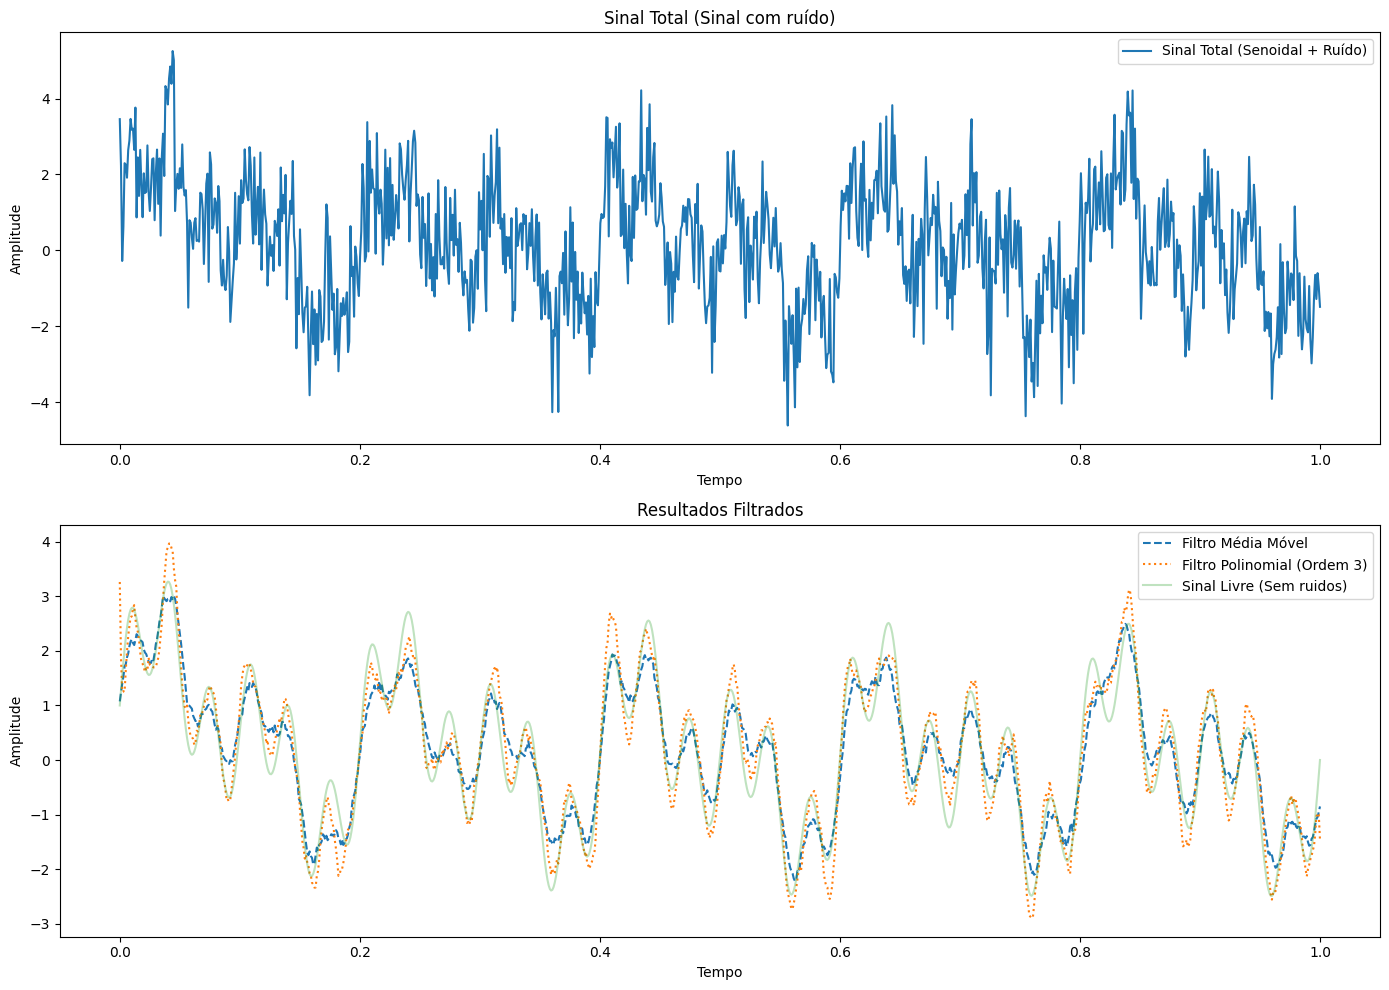

In [56]:
import numpy as np
import matplotlib.pyplot as plt

# Gerar sinal senoidal
t = np.linspace(0, 1, 1000)
senoide = np.sin(2 * np.pi * 5 * t)  # sinal senoidal de frequência 5 Hz
senoide2= np.sin(2 * np.pi * 10 * t)
senoide3= np.sin(2 * np.pi * 30 * t)
exponencial = np.exp(-2*t*np.pi)

# Gerar ruído gaussiano pseudoaleatório
ruido = np.random.normal(0, 1, 1000)  # média 0, desvio padrão 0.5

# Sinal total = senoide + ruído
sinal_total = senoide + senoide2 + senoide3 +exponencial + ruido
sinal_sem_ruido= sinal_total-ruido

# Aplicar filtro de média móvel
def media_movel(data, window_size):
    return np.convolve(data, np.ones(window_size)/window_size, mode='same')

# Aplicar filtro polinomial de ordem 2 (ajuste quadrático)
def filtro_polinomial(data, order):
    smoothed = np.zeros_like(data)
    for i in range(len(data)):
        start = max(0, i - window_size // 2)
        end = min(len(data), i + window_size // 2 + 1)
        coeffs = np.polyfit(np.arange(start, end), data[start:end], order)
        smoothed[i] = np.polyval(coeffs, i)
    return smoothed

# Definir tamanho da janela para filtros
window_size = 20

# Aplicar filtro de média móvel
sinal_suavizado_media_movel = media_movel(sinal_total, window_size)

# Aplicar filtro polinomial de ordem 2
sinal_suavizado_polinomial = filtro_polinomial(sinal_total, order=3)

# Plotar resultados em dois gráficos
plt.figure(figsize=(14, 10))

# Gráfico 1: Soma dos Sinais (Sinal Total)
plt.subplot(2, 1, 1)
plt.plot(t, sinal_total, label='Sinal Total (Senoidal + Ruído)')
plt.title('Sinal Total (Sinal com ruído)')
plt.xlabel('Tempo')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(False)

# Gráfico 2: Resultados Filtrados
plt.subplot(2, 1, 2)
plt.plot(t, sinal_suavizado_media_movel, label='Filtro Média Móvel', linestyle='--')
plt.plot(t, sinal_suavizado_polinomial, label='Filtro Polinomial (Ordem 3)', linestyle=':', alpha=1)
plt.plot(t, sinal_sem_ruido, label='Sinal Livre (Sem ruidos)', alpha=0.3)
plt.title('Resultados Filtrados')
plt.xlabel('Tempo')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(False)

plt.tight_layout()
plt.savefig("sinal.png", dpi=300, bbox_inches='tight')
plt.show()
#comando abaixo para salvar imagem
#from google.colab import files
#files.download("sinal.png")

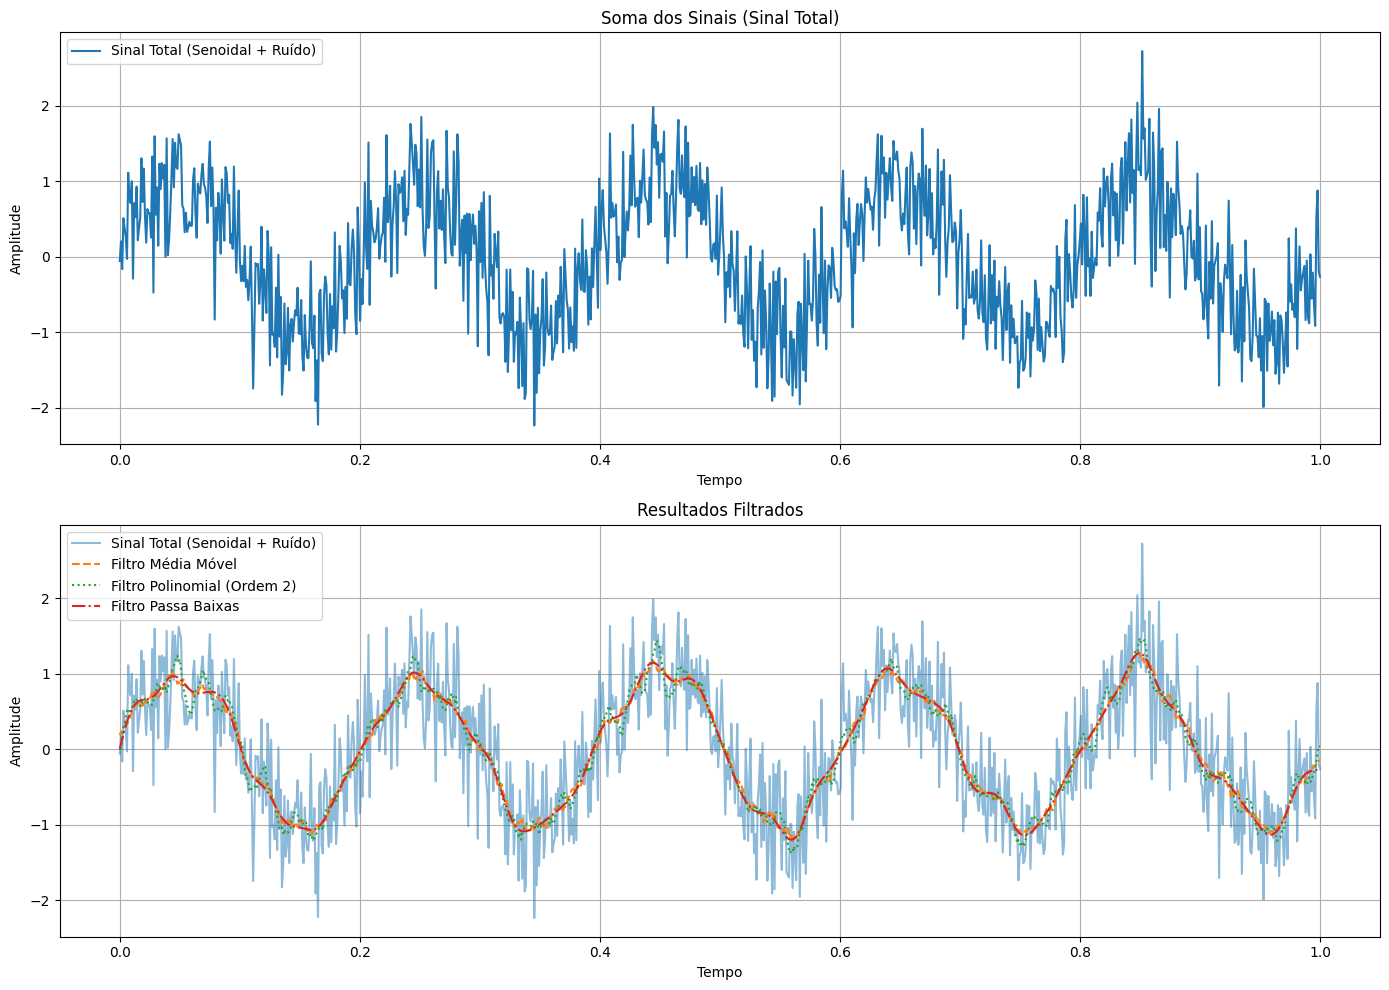

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

# Gerar sinal senoidal
t = np.linspace(0, 1, 1000)
senoide = np.sin(2 * np.pi * 5 * t)  # sinal senoidal de frequência 5 Hz

# Gerar ruído gaussiano pseudoaleatório
ruido = np.random.normal(0, 0.5, 1000)  # média 0, desvio padrão 0.5

# Sinal total = senoide + ruído
sinal_total = senoide + ruido

# Aplicar filtro de média móvel
def media_movel(data, window_size):
    return np.convolve(data, np.ones(window_size)/window_size, mode='same')

# Aplicar filtro polinomial de ordem 2 (ajuste quadrático)
def filtro_polinomial(data, order):
    smoothed = np.zeros_like(data)
    for i in range(len(data)):
        start = max(0, i - window_size // 2)
        end = min(len(data), i + window_size // 2 + 1)
        coeffs = np.polyfit(np.arange(start, end), data[start:end], order)
        smoothed[i] = np.polyval(coeffs, i)
    return smoothed

# Função para aplicar filtro de passa baixas Butterworth
def butter_lowpass(cutoff, fs, order=5):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    return filtfilt(b, a, data)

# Definir parâmetros do filtro de passa baixas
fs = 1000  # frequência de amostragem (Hz)
cutoff = 30  # frequência de corte do filtro de passa baixas (Hz)
order = 5  # ordem do filtro

# Aplicar filtro de passa baixas no sinal regional
sinal_suavizado_passa_baixas = lowpass_filter(sinal_total, cutoff, fs, order)

# Definir tamanho da janela para filtros
window_size = 20

# Aplicar filtro de média móvel
sinal_suavizado_media_movel = media_movel(sinal_total, window_size)

# Aplicar filtro polinomial de ordem 2
sinal_suavizado_polinomial = filtro_polinomial(sinal_total, order=2)

# Plotar resultados em dois gráficos
plt.figure(figsize=(14, 10))

# Gráfico 1: Soma dos Sinais (Sinal Total)
plt.subplot(2, 1, 1)
plt.plot(t, sinal_total, label='Sinal Total (Senoidal + Ruído)')
plt.title('Soma dos Sinais (Sinal Total)')
plt.xlabel('Tempo')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)

# Gráfico 2: Resultados Filtrados
plt.subplot(2, 1, 2)
plt.plot(t, sinal_total, label='Sinal Total (Senoidal + Ruído)', alpha=0.5)
plt.plot(t, sinal_suavizado_media_movel, label='Filtro Média Móvel', linestyle='--')
plt.plot(t, sinal_suavizado_polinomial, label='Filtro Polinomial (Ordem 2)', linestyle=':')
plt.plot(t, sinal_suavizado_passa_baixas, label='Filtro Passa Baixas', linestyle='-.')
plt.title('Resultados Filtrados')
plt.xlabel('Tempo')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


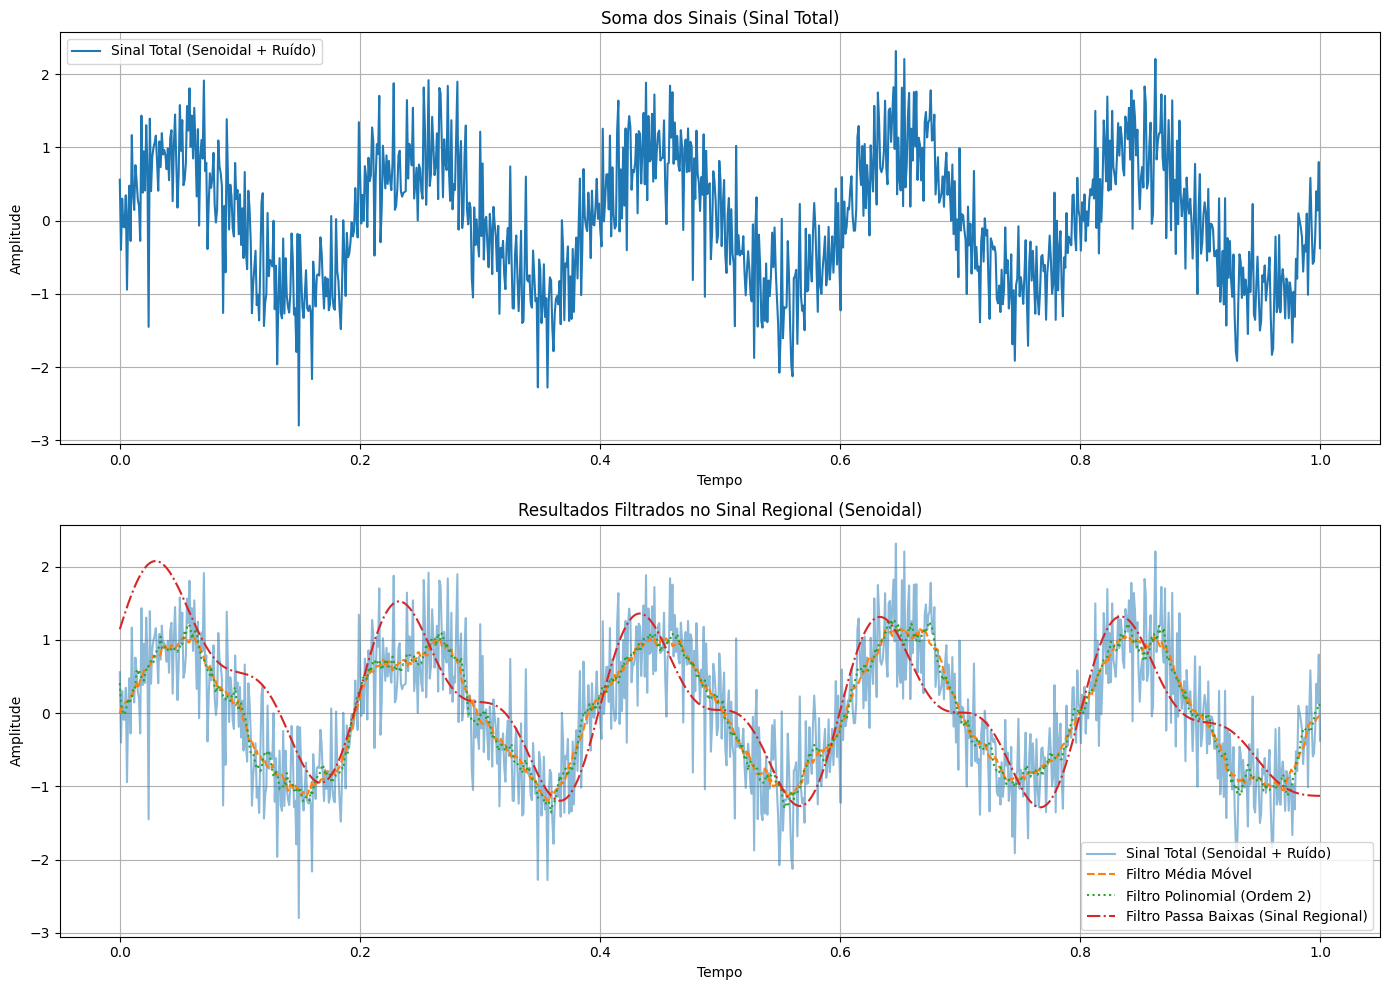

In [21]:


import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

# Gerar sinal senoidal
t = np.linspace(0, 1, 1000)
senoide = np.sin(2 * np.pi * 5 * t)  # sinal senoidal de frequência 5 Hz

# Gerar ruído gaussiano pseudoaleatório
ruido = np.random.normal(0, 0.5, 1000)  # média 0, desvio padrão 0.5

# Sinal total = senoide + ruído
sinal_total = senoide+ruido

# Aplicar filtro de média móvel
def media_movel(data, window_size):
    return np.convolve(data, np.ones(window_size)/window_size, mode='same')

# Aplicar filtro polinomial de ordem 2 (ajuste quadrático)
def filtro_polinomial(data, order):
    smoothed = np.zeros_like(data)
    for i in range(len(data)):
        start = max(0, i - window_size // 2)
        end = min(len(data), i + window_size // 2 + 1)
        coeffs = np.polyfit(np.arange(start, end), data[start:end], order)
        smoothed[i] = np.polyval(coeffs, i)
    return smoothed

# Função para aplicar filtro de passa baixas Butterworth apenas na parte regional (senoide)
def butter_lowpass(cutoff, fs, order=5):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    filtered = filtfilt(b, a, data)
    return filtered

# Definir parâmetros do filtro de passa baixas
fs = 1000  # frequência de amostragem (Hz)
cutoff = 10  # frequência de corte do filtro de passa baixas (Hz)
order = 5  # ordem do filtro

# Aplicar filtro de passa baixas apenas no sinal regional (senoide)
sinal_suavizado_passa_baixas = lowpass_filter(sinal_suavizado_polinomial, cutoff, fs, order)

# Definir tamanho da janela para filtros
window_size = 20

# Aplicar filtro de média móvel
sinal_suavizado_media_movel = media_movel(sinal_total, window_size)

# Aplicar filtro polinomial de ordem 2
sinal_suavizado_polinomial = filtro_polinomial(sinal_total, order=2)

# Plotar resultados em dois gráficos
plt.figure(figsize=(14, 10))

# Gráfico 1: Soma dos Sinais (Sinal Total)
plt.subplot(2, 1, 1)
plt.plot(t, sinal_total, label='Sinal Total (Senoidal + Ruído)')
plt.title('Soma dos Sinais (Sinal Total)')
plt.xlabel('Tempo')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)

# Gráfico 2: Resultados Filtrados
plt.subplot(2, 1, 2)
plt.plot(t, sinal_total, label='Sinal Total (Senoidal + Ruído)', alpha=0.5)
plt.plot(t, sinal_suavizado_media_movel, label='Filtro Média Móvel', linestyle='--')
plt.plot(t, sinal_suavizado_polinomial, label='Filtro Polinomial (Ordem 2)', linestyle=':')
plt.plot(t, sinal_suavizado_passa_baixas, label='Filtro Passa Baixas (Sinal Regional)', linestyle='-.')
plt.title('Resultados Filtrados no Sinal Regional (Senoidal)')
plt.xlabel('Tempo')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
